In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv("public_cars.csv")
raw_data.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
0,Ford,Fusion,mechanical,blue,245000,2006,gasoline,False,gasoline,1.6,...,False,False,False,False,False,False,False,False,7,4250.0
1,Dodge,Caravan,automatic,silver,265542,2002,gasoline,False,gasoline,3.3,...,False,False,False,False,False,False,False,False,133,4000.0
2,Ford,Galaxy,mechanical,blue,168000,2009,diesel,False,diesel,1.8,...,False,True,False,False,True,True,True,True,0,10900.0
3,Mazda,6,mechanical,other,225522,2008,gasoline,False,gasoline,1.8,...,True,False,False,True,False,False,True,True,20,6999.0
4,Audi,80,mechanical,black,370000,1991,gasoline,False,gasoline,1.8,...,False,False,False,False,False,False,False,True,160,1600.0


In [3]:
raw_data.describe(include="all")

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
count,30824,30824,30824,30824,30824.000000,30824.000000,30824,30824,30824,30816.000000,...,30824,30824,30824,30824,30824,30824,30824,30824,30824.000000,30824.000000
unique,55,1070,2,12,NaN,NaN,6,2,3,NaN,...,2,2,2,2,2,2,2,2,NaN,NaN
top,Volkswagen,Passat,mechanical,black,NaN,NaN,gasoline,False,gasoline,NaN,...,False,False,False,False,False,False,False,True,NaN,NaN
freq,3406,1153,20493,6162,NaN,NaN,19259,29754,20511,NaN,...,23945,22341,23417,19916,25599,22767,18043,17787,NaN,NaN
mean,NaN,NaN,NaN,NaN,248803.130515,2002.939690,NaN,NaN,NaN,2.054232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.344407,6630.598604
std,NaN,NaN,NaN,NaN,135760.720763,8.048786,NaN,NaN,NaN,0.667535,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.656926,6412.213626
min,NaN,NaN,NaN,NaN,0.000000,1950.000000,NaN,NaN,NaN,0.200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,158146.500000,1998.000000,NaN,NaN,NaN,1.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,2145.857500
50%,NaN,NaN,NaN,NaN,250000.000000,2003.000000,NaN,NaN,NaN,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,4800.000000
75%,NaN,NaN,NaN,NaN,325000.000000,2009.000000,NaN,NaN,NaN,2.300000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.000000,8950.000000


In [4]:
raw_data.describe()

,odometer_value,year_produced,engine_capacity,duration_listed,price_usd
count,30824.000000,30824.000000,30816.000000,30824.000000,30824.000000
mean,248803.130515,2002.939690,2.054232,80.344407,6630.598604
std,135760.720763,8.048786,0.667535,112.656926,6412.213626
min,0.000000,1950.000000,0.200000,0.000000,1.000000
25%,158146.500000,1998.000000,1.600000,23.000000,2145.857500
50%,250000.000000,2003.000000,2.000000,59.000000,4800.000000
75%,325000.000000,2009.000000,2.300000,91.000000,8950.000000
max,1000000.000000,2019.000000,7.500000,2232.000000,50000.000000


In [5]:
raw_data.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
price_usd            float64
dtype: object

In [6]:
raw_data["manufacturer_name"] = raw_data["manufacturer_name"].astype('category')
raw_data["manufacturer_name"] = raw_data["manufacturer_name"].cat.codes

raw_data["model_name"] = raw_data["model_name"].astype('category')
raw_data["model_name"] = raw_data["model_name"].cat.codes

raw_data["transmission"] = raw_data["transmission"].astype('category')
raw_data["transmission"] = raw_data["transmission"].cat.codes

raw_data["color"] = raw_data["color"].astype('category')
raw_data["color"] = raw_data["color"].cat.codes

raw_data["engine_fuel"] = raw_data["engine_fuel"].astype('category')
raw_data["engine_fuel"] = raw_data["engine_fuel"].cat.codes

raw_data["engine_type"] = raw_data["engine_type"].astype('category')
raw_data["engine_type"] = raw_data["engine_type"].cat.codes

raw_data["engine_has_gas"] = raw_data["engine_has_gas"].astype('category')
raw_data["engine_has_gas"] = raw_data["engine_has_gas"].cat.codes

raw_data["body_type"] = raw_data["body_type"].astype('category')
raw_data["body_type"] = raw_data["body_type"].cat.codes

raw_data["has_warranty"] = raw_data["has_warranty"].astype('category')
raw_data["has_warranty"] = raw_data["has_warranty"].cat.codes

raw_data["state"] = raw_data["state"].astype('category')
raw_data["state"] = raw_data["state"].cat.codes

raw_data["drivetrain"] = raw_data["drivetrain"].astype('category')
raw_data["drivetrain"] = raw_data["drivetrain"].cat.codes

for x in range(10):
    raw_data["feature_"+str(x)] = raw_data["feature_"+str(x)].astype('category')
    raw_data["feature_"+str(x)] = raw_data["feature_"+str(x)].cat.codes
    
raw_data.dtypes

manufacturer_name       int8
model_name             int16
transmission            int8
color                   int8
odometer_value         int64
year_produced          int64
engine_fuel             int8
engine_has_gas          int8
engine_type             int8
engine_capacity      float64
body_type               int8
has_warranty            int8
state                   int8
drivetrain              int8
feature_0               int8
feature_1               int8
feature_2               int8
feature_3               int8
feature_4               int8
feature_5               int8
feature_6               int8
feature_7               int8
feature_8               int8
feature_9               int8
duration_listed        int64
price_usd            float64
dtype: object

In [9]:
raw_data.isnull().sum()
data = raw_data.dropna()

In [10]:
data.describe(include="all")

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
count,30816.000000,30816.000000,30816.000000,30816.000000,30816.000000,30816.000000,30816.000000,30816.000000,30816.000000,30816.000000,...,30816.000000,30816.000000,30816.000000,30816.000000,30816.000000,30816.000000,30816.000000,30816.000000,30816.000000,30816.000000
mean,27.700123,543.476343,0.665012,4.479167,248848.781315,2002.936754,1.974137,0.034722,1.331192,2.054232,...,0.223163,0.275084,0.240297,0.353745,0.169425,0.261195,0.414525,0.576973,80.352836,6627.403698
std,15.885388,311.962934,0.471994,3.594534,135747.228412,8.047727,1.419555,0.183078,0.943579,0.667535,...,0.416374,0.446564,0.427271,0.478139,0.375133,0.439293,0.492648,0.494048,112.668309,6408.444285
min,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,0.000000,0.000000,0.000000,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,14.000000,239.000000,0.000000,1.000000,158500.000000,1998.000000,0.000000,0.000000,0.000000,1.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,2134.120000
50%,31.000000,550.000000,1.000000,4.000000,250000.000000,2003.000000,3.000000,0.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,59.000000,4800.000000
75%,39.000000,803.000000,1.000000,8.000000,325000.000000,2009.000000,3.000000,0.000000,2.000000,2.300000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,91.000000,8950.000000
max,54.000000,1069.000000,1.000000,11.000000,1000000.000000,2019.000000,5.000000,1.000000,2.000000,7.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2232.000000,50000.000000


In [11]:
data

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
0,14,503,1,1,245000,2006,3,0,2,1.6,...,0,0,0,0,0,0,0,0,7,4250.0
1,12,350,0,8,265542,2002,3,0,2,3.3,...,0,0,0,0,0,0,0,0,133,4000.0
2,14,533,1,1,168000,2009,0,0,0,1.8,...,0,1,0,0,1,1,1,1,0,10900.0
3,30,168,1,6,225522,2008,3,0,2,1.8,...,1,0,0,1,0,0,1,1,20,6999.0
4,2,190,1,0,370000,1991,3,0,2,1.8,...,0,0,0,0,0,0,0,1,160,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30819,30,695,0,3,360493,1999,3,0,2,2.5,...,0,0,1,1,0,0,0,1,66,2000.0
30820,2,217,0,4,117000,2009,3,0,2,1.4,...,1,1,0,0,0,1,1,1,58,8800.0
30821,30,173,1,0,333000,1997,3,0,2,2.0,...,0,0,0,0,0,0,0,1,87,1400.0
30822,2,221,0,9,530000,1995,3,0,2,2.6,...,1,0,0,0,0,0,1,1,52,3500.0


In [276]:
# data = raw_data.dropna(axis=0)

# from sklearn import preprocessing
# names = data.columns
# scaler = preprocessing.StandardScaler()
# data = scaler.fit_transform(data)
# data = pd.DataFrame(data, columns=names)


In [277]:
data.describe(include="all")


,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
count,30824.000000,30824.000000,30824.000000,30824.000000,30824.000000,30824.000000,30824.000000,30824.000000,30824.000000,30816.000000,...,30824.000000,30824.000000,30824.000000,30824.00000,30824.000000,30824.000000,30824.000000,30824.000000,30824.000000,30824.000000
mean,27.697508,543.508143,0.664839,4.479432,248803.130515,2002.939690,1.973884,0.034713,1.331106,2.054232,...,0.223170,0.275208,0.240300,0.35388,0.169511,0.261387,0.414644,0.577050,80.344407,6630.598604
std,15.885572,311.978487,0.472054,3.594593,135760.720763,8.048786,1.419457,0.183055,0.943471,0.667535,...,0.416378,0.446626,0.427272,0.47818,0.375209,0.439398,0.492669,0.494036,112.656926,6412.213626
min,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,0.000000,0.000000,0.000000,0.200000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,14.000000,239.000000,0.000000,1.000000,158146.500000,1998.000000,0.000000,0.000000,0.000000,1.600000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,23.000000,2145.857500
50%,31.000000,550.000000,1.000000,4.000000,250000.000000,2003.000000,3.000000,0.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,59.000000,4800.000000
75%,39.000000,803.000000,1.000000,8.000000,325000.000000,2009.000000,3.000000,0.000000,2.000000,2.300000,...,0.000000,1.000000,0.000000,1.00000,0.000000,1.000000,1.000000,1.000000,91.000000,8950.000000
max,54.000000,1069.000000,1.000000,11.000000,1000000.000000,2019.000000,5.000000,1.000000,2.000000,7.500000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,2232.000000,50000.000000


In [278]:

# for i in data.columns.values:
# sns.distplot(scaled_df['manufacturer_name'])

In [279]:
# for i in data:
#     print(data[i])

In [280]:
# q=data['year_produced'].quantile(0.005)
# data1=data[data['year_produced']>q]
# sns.distplot(data1['year_produced'])

In [281]:
# sns.distplot(data1['odometer_value'])

In [282]:
# q = data1['odometer_value'].quantile(0.9918)
# data2 = data1[data1['odometer_value']<q]
# sns.distplot(data2['odometer_value'])

In [283]:
# sns.distplot(data2['engine_capacity'])

In [284]:
# q= data2['engine_capacity'].quantile(0.99)
# data3=data2[data2['engine_capacity']<q]
# sns.distplot(data3['engine_capacity'])

In [285]:
# sns.distplot(data3['duration_listed'])

In [286]:
# q=data3['duration_listed'].quantile(0.80)
# data4= data3[data3['duration_listed']<q]
# data4.describe(include="all")
# sns.distplot(data4['duration_listed'])

In [287]:
# sns.distplot(data4['price_usd'])

In [288]:
# q=data4['price_usd'].quantile(0.89)
# data5= data4[data4['price_usd']<q]
# sns.distplot(data5['price_usd'])

In [289]:
# data_cleaned = data.reset_index(drop=True)

In [290]:
data.isnull().sum()
data = data.dropna()
data.isnull().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
feature_0            0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
duration_listed      0
price_usd            0
dtype: int64

In [227]:
# data

In [228]:
# log_price = np.log(data['price_usd'])
# data['log_price'] = log_price
# data

In [229]:
# f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, sharey=True, figsize=(15,3))
# ax1.scatter(data_cleaned['odometer_value'],data_cleaned['log_price'])
# ax1.set_title('odometer_value & log_price')
# ax2.scatter(data_cleaned['engine_capacity'],data_cleaned['log_price'])
# ax2.set_title('engine_capacity & log_price')
# ax3.scatter(data_cleaned['duration_listed'],data_cleaned['log_price'])
# ax3.set_title('duration_listed & log_price')
# ax4.scatter(data_cleaned['year_produced'],data_cleaned['log_price'])
# ax4.set_title('year_produced & log_price')
# plt.show()

In [230]:
# data_cleaned = data.drop(['price_usd'],axis=1)
# data_cleaned

In [231]:
# data_with_dummies = pd.get_dummies(data_cleaned,drop_first=True)
# data_with_dummies.head()

In [232]:
# data_with_dummies = data_with_dummies['engine_has_gas'].map({True:1,False:0})

In [291]:
targets = data['price_usd']
inputs = data.drop(['price_usd'],axis=1)

columns = inputs.columns.values


In [234]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# variables = inputs[columns]
# a =variables.values
# print(a)
# vif = pd.DataFrame()
# vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# vif["features"] = variables.columns

In [235]:
# vif


In [236]:
# for x in data
# for i, j in vif.iterrows():
#     if j['VIF']>5:
#         new_data = new_data.drop(j['features'],axis=1)
# new_data

In [237]:
# data_no_multicollinearity = data_cleaned.drop(['engine_capacity'],axis=1)

In [238]:
# f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, sharey=True, figsize=(50,10))
# ax1.scatter(new_data['manufacturer_name'],new_data['log_price'])
# ax1.set_title('manufacturer_name & price_usd')
# ax2.scatter(new_data['model_name'],new_data['log_price'])
# ax2.set_title('model_name & price_usd')
# ax3.scatter(new_data['color'],new_data['log_price'])
# ax3.set_title('color & price_usd')
# ax4.scatter(new_data['engine_has_gas'],new_data['log_price'])
# ax4.set_title('engine_has_gas & price_usd')
# plt.show()

In [239]:
# data_no_multicollinearity2 = data_no_multicollinearity.drop(['engine_capacity'],axis=1)
# data_no_multicollinearity2

In [240]:
# data_with_dummies = pd.get_dummies(data_cleaned,drop_first=True)

In [241]:
# data_with_dummies.head()

In [242]:
# data_with_dummies.columns.values

In [292]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [293]:
inputs_scaled = scaler.transform(inputs)


In [294]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled,targets, test_size=0.2, random_state=365)

In [297]:
x_train.size

616300

In [298]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [299]:
y_hat = reg.predict(x_train)

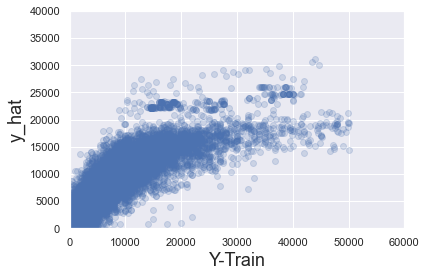

In [300]:
plt.scatter(y_train, y_hat, alpha=0.2)
plt.xlabel("Y-Train",size=18)
plt.ylabel("y_hat",size=18)
plt.xlim(0,60000)
plt.ylim(0,40000)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

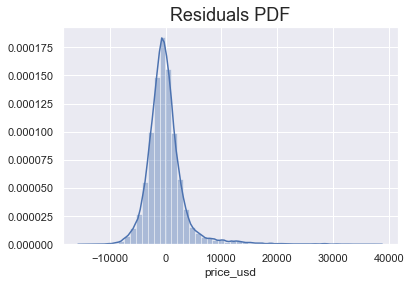

In [301]:
sns.distplot(y_train - y_hat)
plt.title('Residuals PDF',size=18)

In [258]:
reg.score(x_train,y_train)

0.6790865068869727

In [259]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=0.9)
clf.fit(x_train, y_train)

Ridge(alpha=0.9)

In [260]:
y_hat_ridge = clf.predict(x_train)


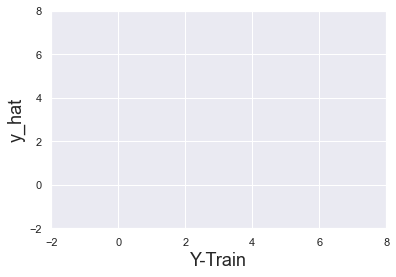

In [261]:
plt.scatter(y_train,y_hat_ridge, alpha=0.2)
plt.xlabel("Y-Train",size=18)
plt.ylabel("y_hat",size=18)
plt.xlim(-2,8)
plt.ylim(-2,8)
plt.show()

In [262]:
clf.score(x_train,y_train)

0.6790864968233818

In [264]:
from sklearn.metrics import mean_squared_error 

MSE = mean_squared_error(y_train,y_hat_ridge) 
print("MSE",MSE)

MSE 13308720.537184704


In [266]:
df_pf = pd.DataFrame(y_hat_ridge, columns=['Prediction'])
y_test = y_train.reset_index(drop=True)
df_pf['Target'] = np.exp(y_train)
df_pf

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Prediction,Target
0,1526.879163,inf
1,641.863068,inf
2,14410.766373,inf
3,5309.936203,inf
4,4358.286077,inf
...,...,...
24647,14416.473718,inf
24648,4735.376969,inf
24649,15463.062988,inf
24650,7107.422947,inf


from sklearn import linear_model
clf_lasso = linear_model.Lasso(alpha=0.4)
clf_lasso.fit(x_train, y_train)


In [85]:
from sklearn import linear_model
clf_lasso = linear_model.Lasso(alpha=0.2)
clf_lasso.fit(x_train, y_train)

Lasso(alpha=0.2)

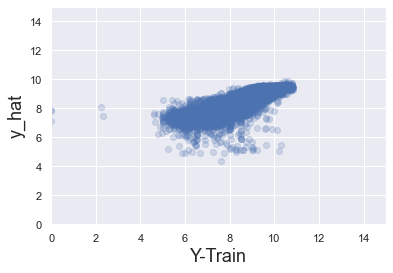

In [86]:
y_hat_lasso = clf_lasso.predict(x_train)
plt.scatter(y_train,y_hat_lasso, alpha=0.2)
plt.xlabel("Y-Train",size=18)
plt.ylabel("y_hat",size=18)
plt.xlim(0,15)
plt.ylim(0,15)
plt.show()

In [87]:
MSE = mean_squared_error(np.exp(y_train),np.exp(y_hat_lasso)) 
print("MSE",MSE)

MSE 20192852.65101641


In [88]:
y_test

8128     7.600902
7162     9.179881
25977    7.313220
13721    9.817385
23565    6.620073
           ...   
5264     7.762171
13275    7.244228
11495    9.510445
19949    9.059517
9457     7.260340
Name: log_price, Length: 6164, dtype: float64

In [249]:
y_hat_test =reg.predict(x_test)
y_hat_test

array([7.08166504e+00, 8.78503418e+00, 6.68835449e+00, ...,
       8.68640137e+00, 7.70458984e+00, 2.90706928e+14])

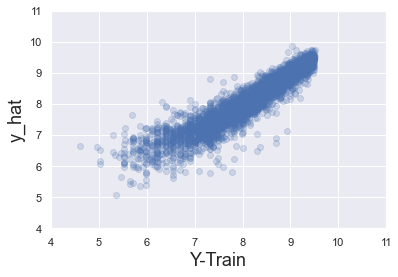

MSE 4.9553902400720085e+26
err 4.955390240072009e+26


In [167]:
plt.scatter(y_test,y_hat_test, alpha=0.2)
plt.xlabel("Y-Train",size=18)
plt.ylabel("y_hat",size=18)
plt.xlim(4,11)
plt.ylim(4,11)
plt.show()

from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(y_test,y_hat_test) 
print("MSE",MSE)
error = np.square(np.subtract(y_test,y_hat_test)).mean()
print("err",error)
# error = np.subtract(df_pf['Target'],df_pf['Prediction'])

In [85]:
y_hat_test

array([7.08166504e+00, 8.78503418e+00, 6.68835449e+00, ...,
       8.68640137e+00, 7.70458984e+00, 2.90706928e+14])

In [119]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.isinf().sum()

<ipython-input-119-6ec45410a447>:1: RuntimeWarning: overflow encountered in exp
  df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])


AttributeError: 'DataFrame' object has no attribute 'isinf'

In [83]:
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,1189.948180,1500.00
1,6535.696365,7999.00
2,802.999822,950.00
3,5453.451044,6000.00
4,2662.020821,3200.00
...,...,...
4264,5784.654227,4849.00
4265,1473.341289,1088.40
4266,5921.833349,6639.48
4267,2218.507261,2250.00


In [126]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(df_pf['Target'],df_pf['Prediction']) 


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
error = np.square(np.subtract(df_pf['Target'],df_pf['Prediction'])).mean()
error

In [ ]:
error.max()
